In [2]:
import numpy as np
import pandas as pd
from datetime import date
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test_bqCt9Pv.csv")

In [4]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
print(train['PERFORM_CNS.SCORE.DESCRIPTION'].nunique())
print(test['PERFORM_CNS.SCORE.DESCRIPTION'].nunique())

20
19


In [6]:
def convert_to_months(duration) :
    s = str(duration)
    s = s.replace('yrs','')
    s = s.replace('mon','')
    
    a = s.split(" ")[0]
    b = s.split(" ")[1]
    a = int(a)
    b = int(b)
    
    k = (12*a) + b
    
    return k

In [7]:
train["AVERAGE.ACCT.AGE"] = train["AVERAGE.ACCT.AGE"].apply(convert_to_months)
train["CREDIT.HISTORY.LENGTH"] = train["CREDIT.HISTORY.LENGTH"].apply(convert_to_months)

test["AVERAGE.ACCT.AGE"] = test["AVERAGE.ACCT.AGE"].apply(convert_to_months)
test["CREDIT.HISTORY.LENGTH"] = test["CREDIT.HISTORY.LENGTH"].apply(convert_to_months)

In [8]:
train.head(8)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,23,23,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,8,15,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0,0,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,...,0,0,1347,0,0,0,21,24,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,...,0,0,0,0,0,0,0,0,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,...,0,0,0,0,0,0,2,2,0,0


In [9]:
test.head(8)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0,0,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,8,12,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0,0,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,29,29,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0,0,0
5,725530,57657,71211,84.64,78,17014,45,2103,01-01-68,Self employed,...,0,0,0,0,0,0,0,0,0,1
6,708592,48518,62767,82.85,78,17014,45,2071,06-09-82,Salaried,...,0,0,0,2122,0,0,0,19,29,0
7,714975,48743,63896,81.38,78,17014,45,2079,24-11-95,Salaried,...,0,0,0,0,0,0,0,0,0,0


In [10]:
null_value_stats = train.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Employment.Type    7661
dtype: int64

In [11]:
train.fillna('a', inplace=True)

In [12]:
null_value_stats = train.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

In [13]:
null_value_stats = test.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Employment.Type    3443
dtype: int64

In [14]:
test.fillna('a', inplace=True)

In [15]:
null_value_stats = test.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

In [16]:
print(train["Date.of.Birth"][5])
print(type(train["Date.of.Birth"][5]))

08-09-90
<class 'str'>


In [17]:
print(train["DisbursalDate"][5])
print(type(train["DisbursalDate"][5]))

19-09-18
<class 'str'>


In [18]:
def day_cnt(d) :
    #print(type(d))
    k = d.split('-')
    #print(k)
    #print(type(k[2]))
    if(k[2] in ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18']) :
        v = str(20) + k[2]
        #print(v)
    else :
        v = str(19) + k[2]
    d0 = date(int(v),int(k[1]),int(k[0]))
    d1 = date(2019,4,18)
    
    return ((d1 - d0) / 30)
    

In [19]:
train["Date.of.Birth"] = train["Date.of.Birth"].apply(day_cnt)
train["DisbursalDate"] = train["DisbursalDate"].apply(day_cnt)

test["Date.of.Birth"] = test["Date.of.Birth"].apply(day_cnt)
test["DisbursalDate"] = test["DisbursalDate"].apply(day_cnt)


In [20]:
def delta_to_int(d1) :
    p = str(d1)
    l = p.split(' ')[0]
    
    return int(l)

In [21]:
train["Date.of.Birth"] = train["Date.of.Birth"].apply(delta_to_int)
train["DisbursalDate"] = train["DisbursalDate"].apply(delta_to_int)

test["Date.of.Birth"] = test["Date.of.Birth"].apply(delta_to_int)
test["DisbursalDate"] = test["DisbursalDate"].apply(delta_to_int)

In [22]:
print(train["Date.of.Birth"][5])
print(type(train["Date.of.Birth"][5]))

348
<class 'numpy.int64'>


In [23]:
print(day_cnt('1-2-17'))

26 days, 20:48:00


In [24]:
delta_to_int(day_cnt('1-2-17'))

26

In [25]:
#print(train["Date.of.Birth"])

In [26]:
X = train.drop('loan_default', axis=1)
#X = X.drop('PERFORM_CNS.SCORE.DESCRIPTION' , axis = 1)
p = X['UniqueID']
X = X.drop('UniqueID' , axis = 1)
y = train['loan_default']


X_test = test
#X_test = X_test.drop('PERFORM_CNS.SCORE.DESCRIPTION' , axis = 1)
X_test = X_test.drop('UniqueID' , axis = 1)

In [27]:
X.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,50578,58400,89.55,67,22807,45,1441,429,Salaried,8,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,67,22807,45,1502,410,Self employed,6,...,0,0,0,1991,0,0,1,23,23,0
2,53278,61360,89.63,67,22807,45,1497,409,Self employed,8,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,67,22807,45,1501,308,Self employed,5,...,0,0,0,31,0,0,0,8,15,1
4,52378,60300,88.39,67,22807,45,1495,503,Self employed,6,...,0,0,0,0,0,0,0,0,0,1


In [28]:
X_test.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,53478,63558,86.54,67,22807,45,1497,551,Salaried,5,...,0,0,0,0,0,0,0,0,0,0
1,55513,63163,89.45,67,22807,45,1497,412,Self employed,4,...,0,0,0,5605,0,1,0,8,12,1
2,65282,84320,79.93,78,23135,86,2071,286,Salaried,4,...,0,0,0,0,0,0,0,0,0,0
3,46905,63896,76.58,78,17014,45,2070,558,Self employed,4,...,0,0,0,0,0,0,0,29,29,0
4,51428,63896,86.08,78,17014,45,2069,570,Salaried,5,...,0,0,0,0,0,0,0,0,0,0


In [29]:
categorical_cols = ['branch_id','supplier_id','manufacturer_id','Current_pincode_ID','State_ID','Employee_code_ID']
label_cols = ['Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION']

In [30]:
# Categorical boolean mask
'''categorical_feature_mask = X.dtypes==object
print(categorical_feature_mask)
print(len(categorical_feature_mask))

print(type(categorical_feature_mask))

for i in categorical_feature_mask :
    categorical_feature_mask = False
print(categorical_feature_mask)
#ctest_mask = X_test.dtypes==object

#print(len(categorical_feature_mask) , len(ctest_mask))'''

'categorical_feature_mask = X.dtypes==object\nprint(categorical_feature_mask)\nprint(len(categorical_feature_mask))\n\nprint(type(categorical_feature_mask))\n\nfor i in categorical_feature_mask :\n    categorical_feature_mask = False\nprint(categorical_feature_mask)\n#ctest_mask = X_test.dtypes==object\n\n#print(len(categorical_feature_mask) , len(ctest_mask))'

In [31]:
'''categorical_feature_mask = [False] * 39
print(categorical_feature_mask)

for i in categorical_cols :
    for j,z in enumerate(X.columns) :
        #print(z)
        if(i == z) :
            print(i)
            categorical_feature_mask[j] = True

print(categorical_feature_mask)'''

'categorical_feature_mask = [False] * 39\nprint(categorical_feature_mask)\n\nfor i in categorical_cols :\n    for j,z in enumerate(X.columns) :\n        #print(z)\n        if(i == z) :\n            print(i)\n            categorical_feature_mask[j] = True\n\nprint(categorical_feature_mask)'

In [32]:
X.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,50578,58400,89.55,67,22807,45,1441,429,Salaried,8,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,67,22807,45,1502,410,Self employed,6,...,0,0,0,1991,0,0,1,23,23,0
2,53278,61360,89.63,67,22807,45,1497,409,Self employed,8,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,67,22807,45,1501,308,Self employed,5,...,0,0,0,31,0,0,0,8,15,1
4,52378,60300,88.39,67,22807,45,1495,503,Self employed,6,...,0,0,0,0,0,0,0,0,0,1


In [33]:
X_test.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,53478,63558,86.54,67,22807,45,1497,551,Salaried,5,...,0,0,0,0,0,0,0,0,0,0
1,55513,63163,89.45,67,22807,45,1497,412,Self employed,4,...,0,0,0,5605,0,1,0,8,12,1
2,65282,84320,79.93,78,23135,86,2071,286,Salaried,4,...,0,0,0,0,0,0,0,0,0,0
3,46905,63896,76.58,78,17014,45,2070,558,Self employed,4,...,0,0,0,0,0,0,0,29,29,0
4,51428,63896,86.08,78,17014,45,2069,570,Salaried,5,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# filter categorical columns using mask and turn it into a list
'''categorical_cols = X.columns[categorical_feature_mask].tolist()
print(categorical_cols)


ct = X_test.columns[categorical_feature_mask].tolist()
print(ct)'''

'categorical_cols = X.columns[categorical_feature_mask].tolist()\nprint(categorical_cols)\n\n\nct = X_test.columns[categorical_feature_mask].tolist()\nprint(ct)'

In [35]:
#categorical_features_indices = [0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,37,38]


In [36]:
print(categorical_cols)
print(label_cols)

['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID']
['Employment.Type', 'PERFORM_CNS.SCORE.DESCRIPTION']


In [37]:
X['PERFORM_CNS.SCORE.DESCRIPTION'].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [38]:
len(X['PERFORM_CNS.SCORE.DESCRIPTION'].unique())

20

In [39]:
replace_map = {'PERFORM_CNS.SCORE.DESCRIPTION':{'No Bureau History Available':18, 'I-Medium Risk':9, 'L-Very High Risk':19,'A-Very Low Risk':1,'Not Scored: Not Enough Info available on the customer':16,'D-Very Low Risk':4, 'M-Very High Risk':20, 'B-Very Low Risk':2,'C-Very Low Risk':3, 'E-Low Risk':5, 'H-Medium Risk':8, 'F-Low Risk':6,'K-High Risk':17,'Not Scored: No Activity seen on the customer (Inactive)':11,'Not Scored: Sufficient History Not Available':14,'Not Scored: No Updates available in last 36 months':13, 'G-Low Risk':7,'J-High Risk':15, 'Not Scored: Only a Guarantor':10,'Not Scored: More than 50 active Accounts found':1}}

In [40]:
#replace_map = {'PERFORM_CNS.SCORE.DESCRIPTION':{sorted(replace_map.items(), key=lambda kv: kv[1])}}

In [41]:
print(replace_map)

{'PERFORM_CNS.SCORE.DESCRIPTION': {'No Bureau History Available': 18, 'I-Medium Risk': 9, 'L-Very High Risk': 19, 'A-Very Low Risk': 1, 'Not Scored: Not Enough Info available on the customer': 16, 'D-Very Low Risk': 4, 'M-Very High Risk': 20, 'B-Very Low Risk': 2, 'C-Very Low Risk': 3, 'E-Low Risk': 5, 'H-Medium Risk': 8, 'F-Low Risk': 6, 'K-High Risk': 17, 'Not Scored: No Activity seen on the customer (Inactive)': 11, 'Not Scored: Sufficient History Not Available': 14, 'Not Scored: No Updates available in last 36 months': 13, 'G-Low Risk': 7, 'J-High Risk': 15, 'Not Scored: Only a Guarantor': 10, 'Not Scored: More than 50 active Accounts found': 1}}


In [42]:
'''labels = train['PERFORM_CNS.SCORE.DESCRIPTION'].astype('category').cat.categories.tolist()
replace_map_comp = {'PERFORM_CNS.SCORE.DESCRIPTION' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)'''

"labels = train['PERFORM_CNS.SCORE.DESCRIPTION'].astype('category').cat.categories.tolist()\nreplace_map_comp = {'PERFORM_CNS.SCORE.DESCRIPTION' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}\n\nprint(replace_map_comp)"

In [43]:
X.replace(replace_map, inplace=True)

print(X.head())

   disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0             50578       58400  89.55         67        22807   
1             47145       65550  73.23         67        22807   
2             53278       61360  89.63         67        22807   
3             57513       66113  88.48         67        22807   
4             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID  Date.of.Birth Employment.Type  \
0               45                1441            429        Salaried   
1               45                1502            410   Self employed   
2               45                1497            409   Self employed   
3               45                1501            308   Self employed   
4               45                1495            503   Self employed   

   DisbursalDate       ...         SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  \
0              8       ...                           0                      0   
1 

In [44]:
print(X["PERFORM_CNS.SCORE.DESCRIPTION"].head())

0    18
1     9
2    18
3    19
4    18
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64


In [45]:
print(X_test['PERFORM_CNS.SCORE.DESCRIPTION'].unique())
print(len(X_test['PERFORM_CNS.SCORE.DESCRIPTION'].unique()))

replace_map_test = {'PERFORM_CNS.SCORE.DESCRIPTION':{'No Bureau History Available':18, 'I-Medium Risk':9, 'L-Very High Risk':19,'A-Very Low Risk':1,'Not Scored: Not Enough Info available on the customer':16,'D-Very Low Risk':4,'B-Very Low Risk':2,'C-Very Low Risk':3, 'E-Low Risk':5, 'H-Medium Risk':8, 'F-Low Risk':6,'K-High Risk':17,'Not Scored: No Activity seen on the customer (Inactive)':11,'Not Scored: Sufficient History Not Available':14,'Not Scored: No Updates available in last 36 months':13, 'G-Low Risk':7,'J-High Risk':15, 'Not Scored: Only a Guarantor':10,'Not Scored: More than 50 active Accounts found':1}}

#print(X_test.head())

['No Bureau History Available' 'C-Very Low Risk'
 'Not Scored: Only a Guarantor' 'K-High Risk' 'B-Very Low Risk'
 'I-Medium Risk' 'D-Very Low Risk' 'A-Very Low Risk' 'M-Very High Risk'
 'E-Low Risk' 'F-Low Risk' 'G-Low Risk'
 'Not Scored: No Activity seen on the customer (Inactive)' 'H-Medium Risk'
 'J-High Risk' 'L-Very High Risk'
 'Not Scored: Sufficient History Not Available'
 'Not Scored: Not Enough Info available on the customer'
 'Not Scored: No Updates available in last 36 months']
19


In [46]:
'''labels_test = X_test['PERFORM_CNS.SCORE.DESCRIPTION'].astype('category').cat.categories.tolist()
replace_map_comp_test = {'PERFORM_CNS.SCORE.DESCRIPTION' : {k: v for k,v in zip(labels_test,list(range(1,len(labels_test)+1)))}}

print(replace_map_comp_test)'''

"labels_test = X_test['PERFORM_CNS.SCORE.DESCRIPTION'].astype('category').cat.categories.tolist()\nreplace_map_comp_test = {'PERFORM_CNS.SCORE.DESCRIPTION' : {k: v for k,v in zip(labels_test,list(range(1,len(labels_test)+1)))}}\n\nprint(replace_map_comp_test)"

In [47]:
X_test.replace(replace_map, inplace=True)

print(X_test.head())

   disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0             53478       63558  86.54         67        22807   
1             55513       63163  89.45         67        22807   
2             65282       84320  79.93         78        23135   
3             46905       63896  76.58         78        17014   
4             51428       63896  86.08         78        17014   

   manufacturer_id  Current_pincode_ID  Date.of.Birth Employment.Type  \
0               45                1497            551        Salaried   
1               45                1497            412   Self employed   
2               86                2071            286        Salaried   
3               45                2070            558   Self employed   
4               45                2069            570        Salaried   

   DisbursalDate       ...         SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  \
0              5       ...                           0                      0   
1 

In [48]:
print(X_test["PERFORM_CNS.SCORE.DESCRIPTION"].head())
#X_test["PERFORM_CNS.SCORE.DESCRIPTION"] = X_test["PERFORM_CNS.SCORE.DESCRIPTION"].astype(np.int64)

0    18
1     3
2    18
3    10
4    18
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64


In [49]:
print(X['Employment.Type'].unique())
print(X_test['Employment.Type'].unique())

['Salaried' 'Self employed' 'a']
['Salaried' 'Self employed' 'a']


In [50]:
replace_m1 = {'Employment.Type':{'a':100000000,'Self employed':1,'Salaried':2}}

In [51]:
'''labels1 = train['Employment.Type'].astype('category').cat.categories.tolist()
replace_m1_comp = {'Employment.Type' : {k: v for k,v in zip(labels1,list(range(1,len(labels1)+1)))}}

print(replace_m1_comp)'''

"labels1 = train['Employment.Type'].astype('category').cat.categories.tolist()\nreplace_m1_comp = {'Employment.Type' : {k: v for k,v in zip(labels1,list(range(1,len(labels1)+1)))}}\n\nprint(replace_m1_comp)"

In [52]:
X.replace(replace_m1, inplace=True)

print(X.head())

   disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0             50578       58400  89.55         67        22807   
1             47145       65550  73.23         67        22807   
2             53278       61360  89.63         67        22807   
3             57513       66113  88.48         67        22807   
4             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID  Date.of.Birth  Employment.Type  \
0               45                1441            429                2   
1               45                1502            410                1   
2               45                1497            409                1   
3               45                1501            308                1   
4               45                1495            503                1   

   DisbursalDate       ...         SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  \
0              8       ...                           0                      0

In [53]:
X_test.replace(replace_m1, inplace=True)

print(X_test.head())

   disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0             53478       63558  86.54         67        22807   
1             55513       63163  89.45         67        22807   
2             65282       84320  79.93         78        23135   
3             46905       63896  76.58         78        17014   
4             51428       63896  86.08         78        17014   

   manufacturer_id  Current_pincode_ID  Date.of.Birth  Employment.Type  \
0               45                1497            551                2   
1               45                1497            412                1   
2               86                2071            286                2   
3               45                2070            558                1   
4               45                2069            570                2   

   DisbursalDate       ...         SEC.CURRENT.BALANCE  SEC.SANCTIONED.AMOUNT  \
0              5       ...                           0                      0

In [54]:
X['Employment.Type'].head()

0    2
1    1
2    1
3    1
4    1
Name: Employment.Type, dtype: int64

In [55]:
X_test['Employment.Type'].head()

0    2
1    1
2    2
3    1
4    2
Name: Employment.Type, dtype: int64

In [56]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [57]:
'''# apply le on categorical feature columns
X[label_cols] = X[label_cols].apply(lambda col: le.fit_transform(col))
print(X[label_cols].head(10))


X_test[label_cols] = X_test[label_cols].apply(lambda col: le.fit_transform(col))
print(X[label_cols].head(10))'''

'# apply le on categorical feature columns\nX[label_cols] = X[label_cols].apply(lambda col: le.fit_transform(col))\nprint(X[label_cols].head(10))\n\n\nX_test[label_cols] = X_test[label_cols].apply(lambda col: le.fit_transform(col))\nprint(X[label_cols].head(10))'

In [58]:
# apply le on categorical feature columns
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
print(X[categorical_cols].head(10))


X_test[categorical_cols] = X_test[categorical_cols].apply(lambda col: le.fit_transform(col))
print(X[categorical_cols].head(10))

   branch_id  supplier_id  manufacturer_id  Current_pincode_ID  State_ID  \
0         30         1415                0                1339         5   
1         30         1415                0                1397         5   
2         30         1415                0                1392         5   
3         30         1415                0                1396         5   
4         30         1415                0                1391         5   
5         30         1415                0                1396         5   
6         30         1415                0                1397         5   
7         30         1415                0                1396         5   
8         30         1415                0                1392         5   
9         30         1415                0                1388         5   

   Employee_code_ID  
0              1588  
1              1588  
2              1588  
3              1588  
4              1588  
5              1588  
6        

In [59]:
np.save('X_train_clean.npy', X)

In [60]:
X_test.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,53478,63558,86.54,30,1345,0,1351,551,2,5,...,0,0,0,0,0,0,0,0,0,0
1,55513,63163,89.45,30,1345,0,1351,412,1,4,...,0,0,0,5605,0,1,0,8,12,1
2,65282,84320,79.93,39,1566,5,1880,286,2,4,...,0,0,0,0,0,0,0,0,0,0
3,46905,63896,76.58,39,518,0,1879,558,1,4,...,0,0,0,0,0,0,0,29,29,0
4,51428,63896,86.08,39,518,0,1878,570,2,5,...,0,0,0,0,0,0,0,0,0,0


In [61]:
seed = 7
test_size = 0.33

In [62]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [63]:
np.save('X_test_clean.npy', X_test)

In [64]:
y_pred = model.predict(X_test)

In [65]:
print(X['PERFORM_CNS.SCORE.DESCRIPTION'].dtypes)

int64


In [66]:
print(y_pred)
print(len(y_pred))
print(len([i for i in y_pred if i == 1]))

[0 0 0 ... 0 0 0]
112392
205


In [67]:
X_test = test
X_test["loan_default"] = y_pred


In [68]:
X1 = X_test.drop(X_test.columns.to_series()["disbursed_amount":"NO.OF_INQUIRIES"], axis=1)

In [69]:
X1.head()

,UniqueID,loan_default
0,655269,0
1,723482,0
2,758529,0
3,763449,0
4,708663,0


In [70]:
X1.to_csv('results_XGboost.csv' , index=False)

In [71]:
X.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,50578,58400,89.55,30,1415,0,1339,429,2,8,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,30,1415,0,1397,410,1,6,...,0,0,0,1991,0,0,1,23,23,0
2,53278,61360,89.63,30,1415,0,1392,409,1,8,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,30,1415,0,1396,308,1,5,...,0,0,0,31,0,0,0,8,15,1
4,52378,60300,88.39,30,1415,0,1391,503,1,6,...,0,0,0,0,0,0,0,0,0,1


In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [74]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [80]:
finalDf

,principal component 1,principal component 2,loan_default
0,-3.285183e+06,-3.342646e+05,0
1,-3.285318e+06,-2.601313e+05,1
2,-3.285184e+06,-3.342646e+05,0
3,-3.285183e+06,-3.342644e+05,1
4,-3.285184e+06,-3.342646e+05,1
5,-3.285183e+06,-3.342599e+05,0
6,-3.285183e+06,-3.342648e+05,0
7,-3.285408e+06,-2.198441e+05,0
8,-3.286006e+06,1.774959e+05,0
9,-3.285183e+06,-3.342555e+05,0


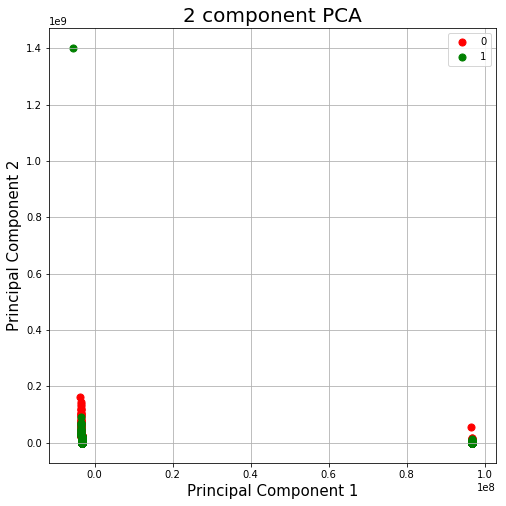

In [79]:
import matplotlib.pyplot as plt



fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['loan_default'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
